Uses an aritificial recurrent neural network using Long Short Term Memory (LSTM) to predict the closing stock price of NVIDA using the past 60 day stock price. We use LSTM as they are an improved version of recurrent neural networks (RNNs), that are better suited to time-series forecasting due to their ability to remember outputs of each node for a more extended period of time.

In [36]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta


In [37]:
#Get the stock quote
df = web.DataReader('NVDA', data_source = 'yahoo', start = date.today() + relativedelta(years = -5), end = date.today())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-23,49.712502,48.950001,49.445000,49.154999,42869600.0,48.637707
2017-10-24,49.687500,48.985001,49.247501,49.669998,40724400.0,49.147282
2017-10-25,49.805000,47.792500,49.270000,48.415001,82816000.0,47.905499
2017-10-26,49.040001,48.452499,48.695000,48.922501,32274400.0,48.407665
2017-10-27,50.467499,49.187500,49.450001,50.465000,57219200.0,49.933926
...,...,...,...,...,...,...
2022-10-17,119.480003,115.169998,115.180000,118.879997,58077400.0,118.879997
2022-10-18,124.919998,116.180000,123.440002,119.669998,65936200.0,119.669998
2022-10-19,123.500000,118.339996,118.790001,120.510002,52313100.0,120.510002


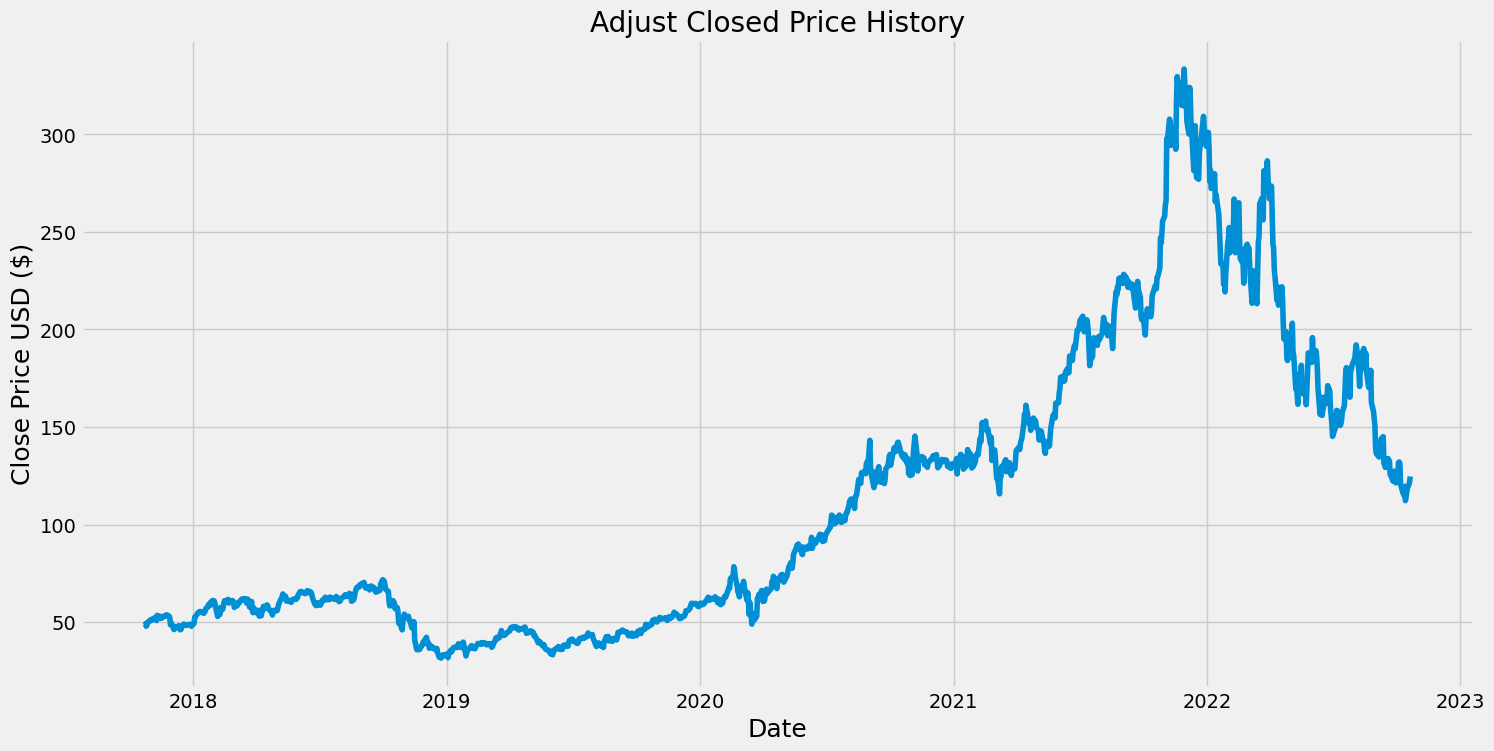

In [38]:
#Visualise the adjusted close history
plt.figure(figsize = (16,8))
plt.title('Adjust Closed Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [39]:
#Create a new dataframe with only the 'Adj Close' column
data = df.filter(['Adj Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on (80/20 Training/Test split)
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1008

In [40]:
#Scale the data as part of data pre-processing
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0566073 ],
       [0.05829493],
       [0.05418235],
       ...,
       [0.29463652],
       [0.29937245],
       [0.30838065]])

In [41]:
#Create the training data set
train_data = scaled_data[0:training_data_len, :]
#Split into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #x_train will have the 60 values
    y_train.append(train_data[i, 0]) #y_train will contain the 61st value

In [42]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [44]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False, input_shape = (x_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))



In [45]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
#Train the model
model.fit(x_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
30/30 [==============================] - 1s 28ms/step - loss: 3.4463e-04
Epoch 2/25
30/30 [==============================] - 1s 28ms/step - loss: 3.2933e-04
Epoch 3/25
30/30 [==============================] - 1s 29ms/step - loss: 3.2173e-04
Epoch 4/25
30/30 [==============================] - 1s 29ms/step - loss: 3.3802e-04
Epoch 5/25
30/30 [==============================] - 1s 29ms/step - loss: 3.2283e-04
Epoch 6/25
30/30 [==============================] - 1s 29ms/step - loss: 3.1032e-04
Epoch 7/25
30/30 [==============================] - 1s 28ms/step - loss: 2.9494e-04
Epoch 8/25
30/30 [==============================] - 1s 30ms/step - loss: 2.8255e-04
Epoch 9/25
30/30 [==============================] - 1s 30ms/step - loss: 2.7879e-04
Epoch 10/25
30/30 [==============================] - 1s 28ms/step - loss: 2.8040e-04
Epoch 11/25
30/30 [==============================] - 1s 28ms/step - loss: 2.9122e-04
Epoch 12/25
30/30 [==============================] - 1s 28ms/step - loss: 

In [47]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Split into x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) #x_train will have the 60 values

In [48]:
#Convert data to numpy array
x_test = np.array(x_test)

In [49]:
#Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions

8/8 [==============================] - 1s 11ms/step


array([[220.1337 ],
       [221.79854],
       [224.20323],
       [226.83253],
       [229.72388],
       [232.92822],
       [236.29515],
       [239.86935],
       [243.49127],
       [248.42023],
       [253.87543],
       [259.90558],
       [265.93765],
       [271.1561 ],
       [276.04663],
       [280.46094],
       [284.19574],
       [287.40692],
       [289.70483],
       [292.41092],
       [295.76828],
       [298.90683],
       [301.70984],
       [304.5851 ],
       [306.82388],
       [309.4146 ],
       [311.74057],
       [313.26883],
       [314.55756],
       [314.9715 ],
       [314.55807],
       [314.70557],
       [314.86353],
       [314.46194],
       [313.63916],
       [311.6846 ],
       [309.2277 ],
       [307.48914],
       [305.30426],
       [302.74817],
       [300.05045],
       [297.99014],
       [296.54153],
       [295.6622 ],
       [295.77545],
       [296.21094],
       [296.71555],
       [297.06232],
       [297.21753],
       [297.55533],


In [51]:
#Evaluate the model using RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.484299131598606

C:\Users\65903\AppData\Local\Temp\ipykernel_32892\3054959948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


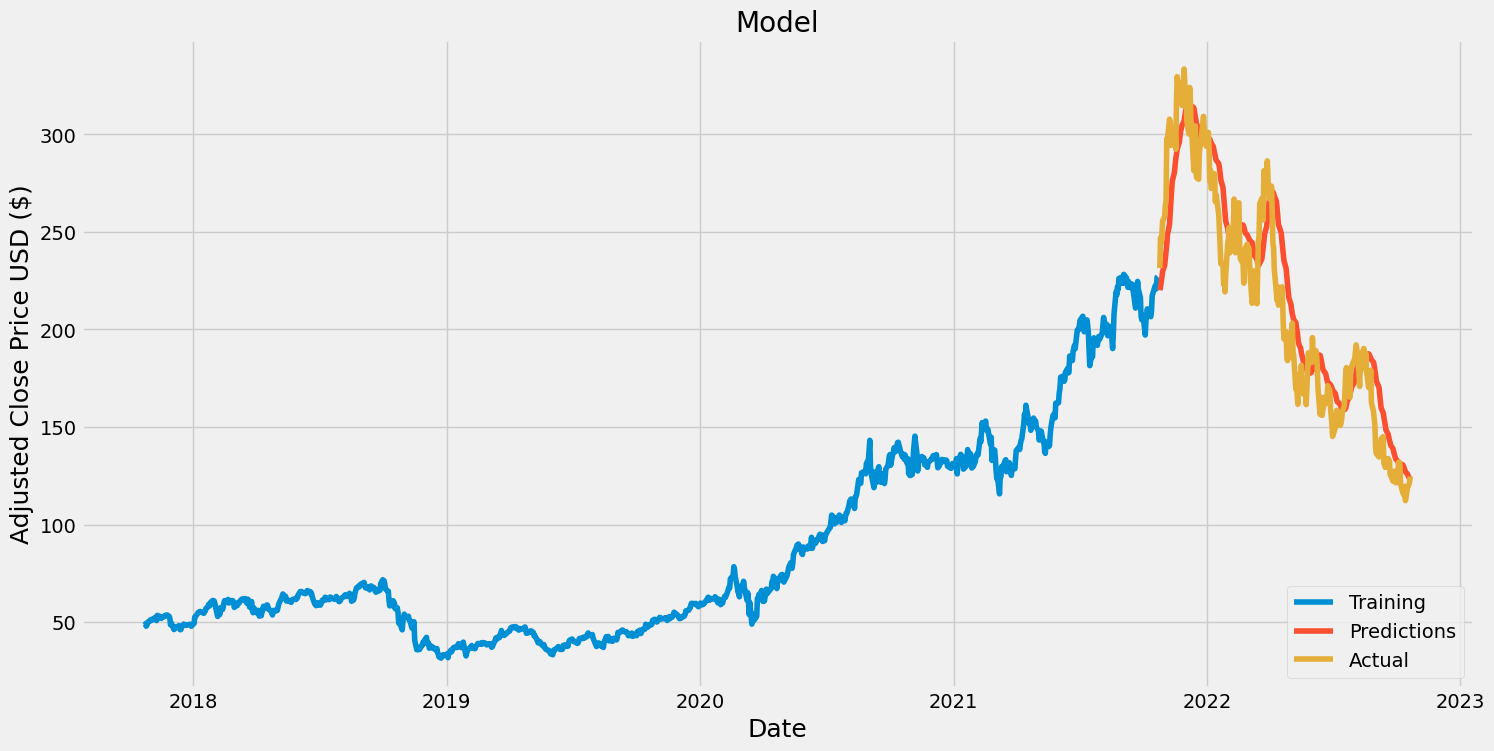

In [52]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Data Visualisation
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Date', fontsize = 18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid['Predictions'])
plt.plot(valid['Adj Close'])
plt.legend(['Training', 'Predictions', 'Actual'], loc = 'lower right')

In [124]:
#Prediction of stock prices
test_quote = web.DataReader('NVDA', data_source = 'yahoo', start = date.today() + relativedelta(days = -120), end = date.today())

#Create a new dataframe
test_quote_close = test_quote.filter(['Adj Close'])

prediction_prices = []

#Repeat the process of predictions 5 times to get predictions from 24 October - 4 November
for i in range(12):
    last_60_days = test_quote_close[-71 + i:-(11 + i)].values
    last_60_days_scaled = scaler.transform(last_60_days)
    x_test = []
    x_test.append(last_60_days_scaled)
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    pred_price = model.predict(x_test)

    #Reverse scaling
    pred_price = scaler.inverse_transform(pred_price)
    #Append prediction prices to the list
    prediction_prices.append(pred_price[0][0])

prediction_prices

1/1 [==============================] - 0s 15ms/step


[129.06064,
 127.46651,
 125.89961,
 124.98986,
 125.43991,
 126.54351,
 127.57786,
 128.4058,
 130.07405,
 132.03583,
 133.5483,
 134.6691]

In [126]:
submission = pd.DataFrame(prediction_prices, columns = ['Close'])
submission.to_csv('Alexius_Pooh_Kai_Jie_Impl_1.csv')